# Avanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

**2.a)** Load the dataset `penguins_size.csv`.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
df = pd.read_csv(os.path.abspath('penguins_size.csv'))
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**2.b)** Discard any row that has a missing value.

In [2]:
df = df.dropna(axis=0)

**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [3]:
df2 = df.iloc[:,[0,1,5,6]]
print(df2.groupby(['island','species','sex'])['body_mass_g'].count())

island     species    sex   
Biscoe     Adelie     FEMALE    22
                      MALE      22
           Gentoo     FEMALE    58
                      MALE      61
Dream      Adelie     FEMALE    27
                      MALE      28
           Chinstrap  FEMALE    34
                      MALE      34
Torgersen  Adelie     FEMALE    24
                      MALE      23
Name: body_mass_g, dtype: int64


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

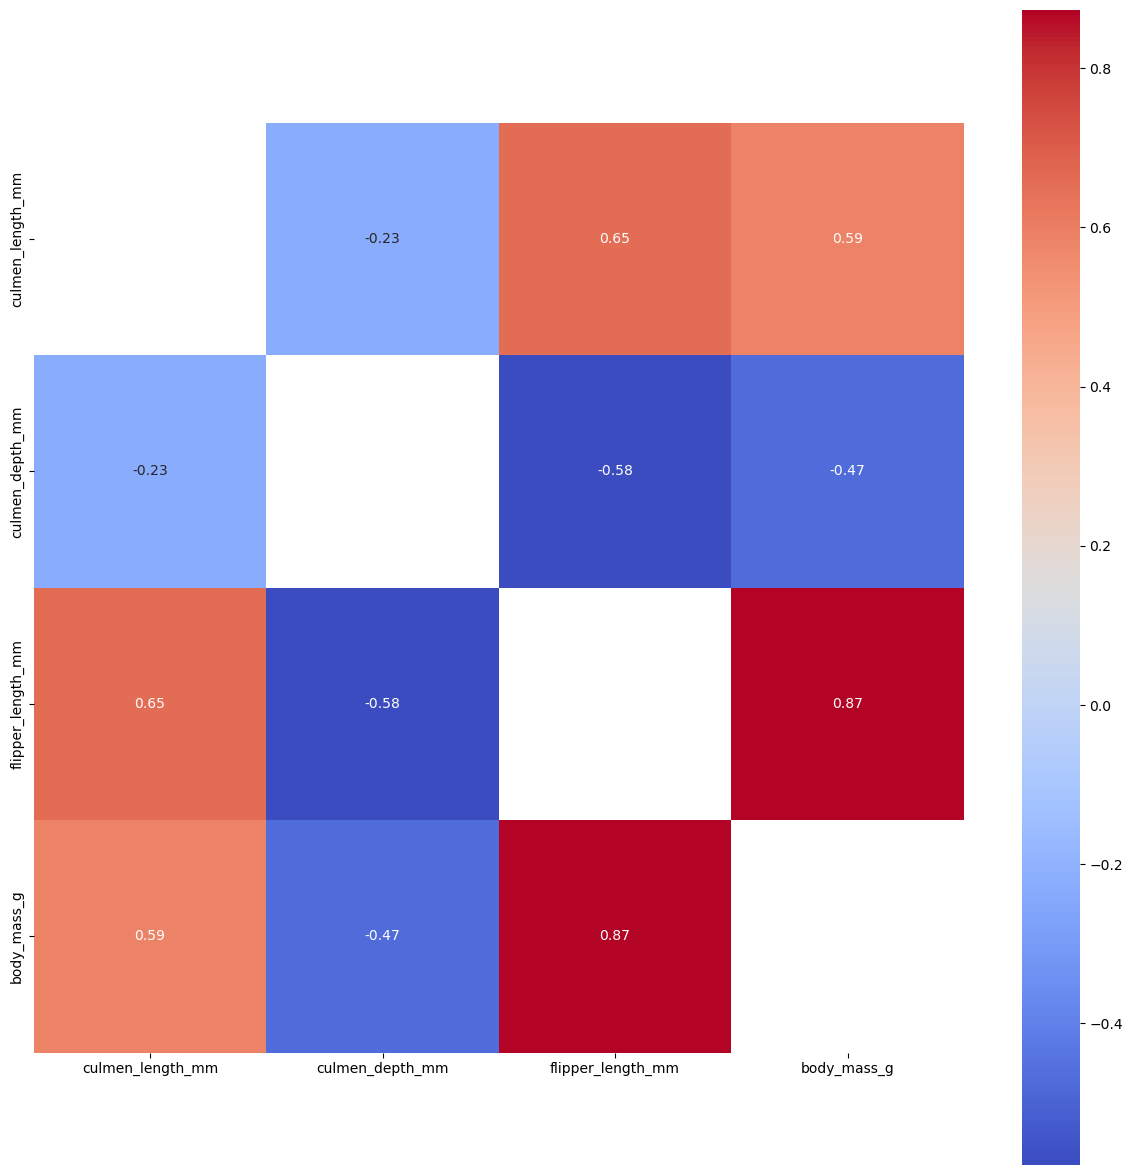

In [4]:
from scipy.stats import pearsonr
df_corrs = df.corr(numeric_only=True, method='pearson')
pval = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['flipper_length_mm'].values.reshape(-1, 1)
y = df['body_mass_g'].values.reshape(-1, 1)
regr = LinearRegression()
regr.fit(X, y)

print('body_mass_g = {:.4f} + {:.4f} * flipper_length_mm '.format(regr.intercept_[0], regr.coef_[0][0]))
medv_pred = regr.predict(X)
r2_value = r2_score(y, medv_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -5872.0927 + 50.1533 * flipper_length_mm 
R^2: 0.7621


**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

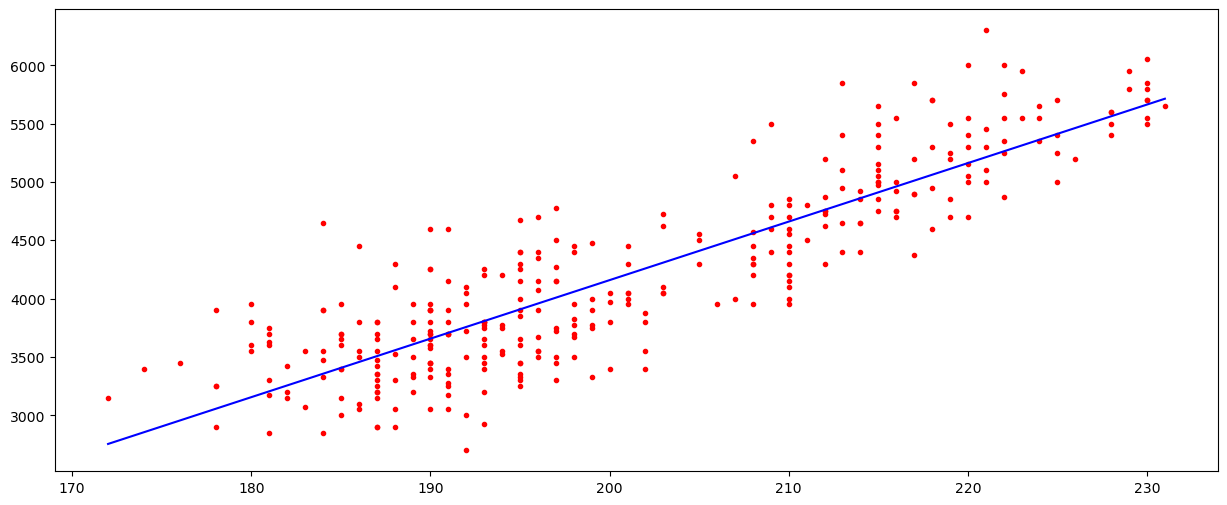

In [7]:
limits_flipper_length_mm = np.array([min(X), max(X)])
body_mass_g_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_flipper_length_mm
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df['flipper_length_mm'], df['body_mass_g'], '.r')
plt.plot(limits_flipper_length_mm ,body_mass_g_vals, 'b-')
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [9]:
result_2g = regr.intercept_[0] + regr.coef_[0][0]*50
print(result_2g)

-3364.4293857307684


**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [38]:
cols = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']
X = df[cols].values
y = df['body_mass_g'].values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X,y)

print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1],regr.coef_[0][2]))

body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -6445.4760 + 3.2929 * culmen_length_mm + 17.8364 * culmen_depth_mm + 50.7621 * flipper_length_mm
R^2: 0.7639


**2.i)** Perform a multiple linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [54]:
# Converts non-numeric columns into separate boolean columns, for each different category
df_2i = pd.get_dummies(df,columns = ['species', 'island'],dtype=int)
df_2i['sex'] = (df_2i['sex'] == "MALE").astype(int)

# Define X and y for the regression
X = df_2i.drop(['body_mass_g'],axis=1).values
y = df_2i['body_mass_g'].values.reshape(-1, 1)

# Initialize linear regression
regr = LinearRegression()
regr.fit(X,y)

# Print linear regression expression
print('body_mass_g = {:.4f} + {:.4f} * culmen_length_mm + {:.4f} * culmen_depth_mm + {:.4f} * flipper_length_mm + {:.4f} * sex + {:.4f} * species_Adelie + {:.4f} * species_Chinstrap + {:.4f} * species_Gentoo + {:.4f} * island_Biscoe + {:.4f} * island_Dream + {:.4f} * island_Torgersen'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2], regr.coef_[0][3], regr.coef_[0][4], regr.coef_[0][5], regr.coef_[0][6], regr.coef_[0][7], regr.coef_[0][8], regr.coef_[0][9]))

# R^2 calculation
body_mass_g_pred = regr.predict(X)
r2_value = r2_score(y, body_mass_g_pred)
print('R^2: {:.4f}'.format(r2_value))

body_mass_g = -1277.9329 + 18.1893 * culmen_length_mm + 67.5754 * culmen_depth_mm + 16.2385 * flipper_length_mm + 387.2243 * sex + -242.4851 * species_Adelie + -502.7913 * species_Chinstrap + 745.2764 * species_Gentoo + 20.3889 * island_Biscoe + 7.2858 * island_Dream + -27.6747 * island_Torgersen
R^2: 0.8752


COMMENT: $R^2$ being greater than the previous one makes sense, since more variables are being used for the linear regression, akin to the effect an overfitting would have.

## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?

**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

**8)** Enter your GitHub repository webpage.